In [7]:
import pandas as pd
import numpy as np

In [8]:
df_error_liquids = pd.read_csv('df_error_liquids.csv')

In [9]:
def log_vp_pa_to_log_vp_mmhg(x):
    pa = 10**x
    mmhg = pa * 0.00750062
    return np.log10(mmhg)
def log_vp_mmhg_to_log_vp_pa(x):
    mmhg_vp = 10**x
    pa_vap = mmhg_vp * 133.322
    return np.log10(pa_vap)

In [10]:
#add to error df
df_error_liquids['VP_log10_mmHg'] = df_error_liquids['VP'].apply(log_vp_pa_to_log_vp_mmhg)
df_error_liquids

,molregno,PhysChem,MDFP+,MDFP+PhysChem,2DCounts,VP,PhysChem_error,MDFP+_error,MDFP+PhysChem_error,2DCounts_error,smiles,VP_log10_mmHg
0,723,-1.604864,-1.720803,-1.743477,-2.416073,0.912402,2.517266,2.633205,2.655878,3.328475,O=P(OCCCl)(OCCCl)OCCCl,-1.212501
1,2563,0.472648,-2.001686,1.930594,-1.208827,3.050202,2.577554,5.051888,1.119608,4.259029,O=[N+]([O-])C([N+](=O)[O-])([N+](=O)[O-])[N+](...,0.925299
2,2778,-0.159919,-1.004652,-0.445753,-1.218124,1.052502,1.212421,2.057154,1.498254,2.270625,CCOC(=O)c1ccccc1O,-1.072401
3,2850,0.479737,0.421612,0.073969,0.682488,1.898002,1.418265,1.476390,1.824033,1.215514,O=Cc1ccccc1O,-0.226901
4,2875,-5.948981,0.227228,-8.226305,-0.657237,1.866521,7.815502,1.639294,10.092826,2.523759,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...,-0.258382
5,3122,0.094465,0.532267,0.233106,0.381868,1.680002,1.585538,1.147736,1.446896,1.298134,Cc1cccc([N+](=O)[O-])c1C,-0.444901
6,3222,2.113338,2.279860,2.564292,4.680817,0.910202,1.203136,1.369658,1.654091,3.770615,NC=O,-1.214701
7,4134,-2.416055,-4.724137,-3.168877,-2.335942,-1.260098,1.155957,3.464039,1.908779,1.075844,NCCNCCNCCN,-3.385001
8,16745,-0.649176,-1.165610,-1.315578,-3.725809,0.540901,1.190077,1.706511,1.856479,4.266710,CCCCOCCOCCOCCCC,-1.584002


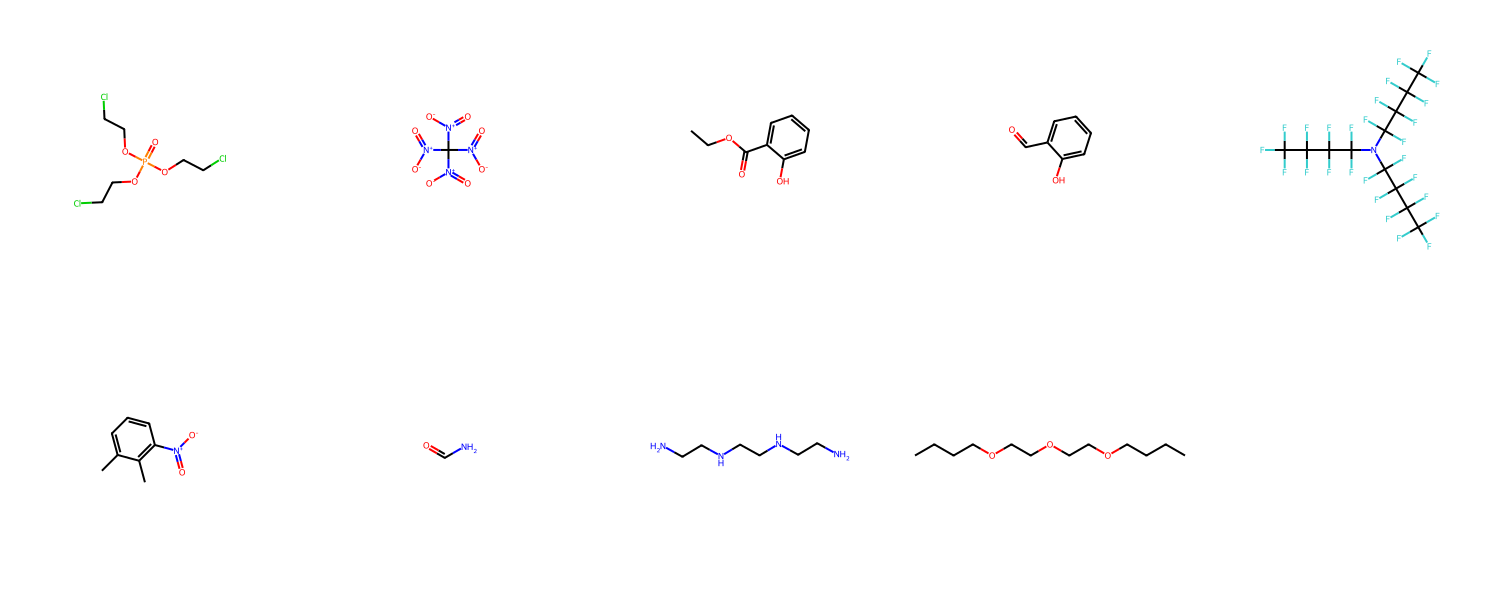

In [11]:
#draw
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

mols = [Chem.MolFromSmiles(smi) for smi in df_error_liquids['smiles']]
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(300,300))
img

In [12]:
#get canonical smiles for these
df_error_liquids['canonical_smiles'] = [Chem.MolToSmiles(Chem.MolFromSmiles(smi)) for smi in df_error_liquids['smiles']]
#print them out
for i, row in df_error_liquids.iterrows():
    print(row['canonical_smiles'])

O=P(OCCCl)(OCCCl)OCCCl
O=[N+]([O-])C([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-]
CCOC(=O)c1ccccc1O
O=Cc1ccccc1O
FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F
Cc1cccc([N+](=O)[O-])c1C
NC=O
NCCNCCNCCN
CCCCOCCOCCOCCCC


First one: Tris(2-chloroethyl) phosphate, from DOBRY,A & KELLER,R (1957)
https://pubs.acs.org/doi/epdf/10.1021/j150556a052
There found as: 14 Tris-(/3-chloroethyl) phosphate
With A = 1917 and c = 5.22, giving

In [13]:
#log P (in mm.'of Hg) = -A/T (°K.) + C
logmmhg = -1917/298 + 7.5
print('literature val logmmhg ', logmmhg) #not in agreement with OPERA value
print('literature val logPa ', log_vp_mmhg_to_log_vp_pa(logmmhg))
#but pred models is all negative 

literature val logmmhg  1.0671140939597317
literature val logPa  3.192015913968092


Other paper: https://pubs.rsc.org/en/content/articlehtml/2020/em/d0em00222d
gives 6.67 Pa (0.8 log10Pa), which is close to recorded value
However, yet another reports closer to the predictions: https://pubs.acs.org/doi/full/10.1021/je401026a, with -1.6/-1.32

Second one: Tetranitromethane, from BOUBLIK,T ET AL. (1984)
This one actually got its own paper: G. Edwards, The Vapor Pressure of Tetranitromethane, Trans. Faraday Soc. 1952, 48, 513. (https://pubs.rsc.org/en/content/articlepdf/1952/tf/tf9524800513)
Not much to say I guess 

In [19]:
loglop = 7.23 - 2130/298#incmh
#convert to cmhg
lop = 10**loglop
print('lop', lop)
vp_pa = 1611.58
vp_log10_pa = np.log10(vp_pa)
#and in mmhg, just * 10 the lop
vp_log10_mmhg = np.log10(lop * 10)
print('vp_log10_mmhg', vp_log10_mmhg)
print('vp_log10_pa', vp_log10_pa) #in in agreement with OPERA value

lop 1.2087848083721013
vp_log10_mmhg 1.0823489932885915
vp_log10_pa 3.20725186907652


Thirs one: Ethyl salicylate (PERRY,RH & GREEN,D (1984)). 
Seems to be more like -2/-3 (log10 mmHg) https://pubs.acs.org/doi/pdf/10.1021/i360057a009, rather then -1 as in OPERA
But different SDS range in 0.0035 and 0.005, leaning more towards -1 in log scale too.


Four: Salicylaldehyde (DAUBERT,TE & DANNER,RP (1989))
88.7 mmHg at 20C according to handbook from Daubert, which would mean almost 2 log10 mmHg, while in SDF -0.22 is recorded. 
However, all models actually underestimate so this is not the problem

Five: Perfluorotributylamine (RIDDICK,JA ET AL. (1986)|?)
73 Pa according to more recent paper https://link.springer.com/article/10.1007/s11027-015-9684-6 (1.8 in log). In agreement

Six: 3-Nitro-o-xylol can't really find much info. Similar compounds in Thermochemistry of substituted benzenes:
quantification of ortho-, para-, meta-, and
buttress interactions in alkyl-substituted
nitrobenzenes
Closest has 18.05 Pa

Seven: formamide (DAUBERT,TE & DANNER,RP (1989))
122.5 mmHg at 20 according to new Daubert --> +2 rather then -1, 3 log units off. 
But other sources, such as https://kpfu.ru/staff_files/F352406286/2011_Thermochemical.Properties.of.Formamide.Revisited.New.Experiment.and.Quantum.Mechanical.Calculations.pdf, again closer to what we have now

Eight: Triethylenetetramine (YAWS,CL (1994))
downloaded: file:///home/cschiebroek/Downloads/book.pdf

In [34]:
#log10 P = A - B/(T + C)
log10mmhg = 8.10006 - 2319.7769 / (25+177.916) 
log10mmhg #in agreement

-3.332142980543674

Nine: diethylene glycol dibutyl ether. available in same source:

In [35]:
log10mmhg = 8.24334 - 2691.5977/ (25+245.877)
log10mmhg #in agreement


-1.6932648058712978

In summary: most things seem to be in agreement with other sources, but not always. And in this case, hard to say which one to believe. In these cases also often no description of the actual experiment.
